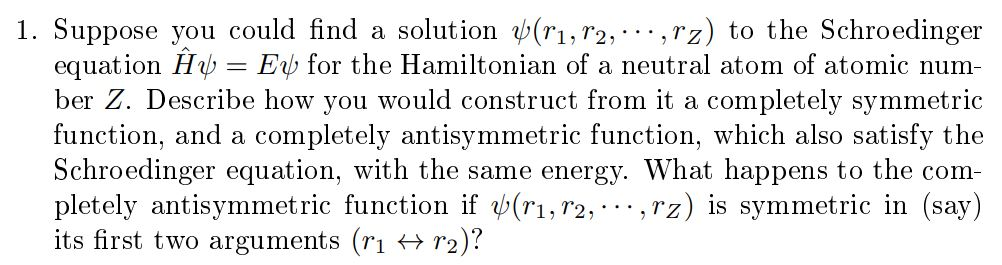

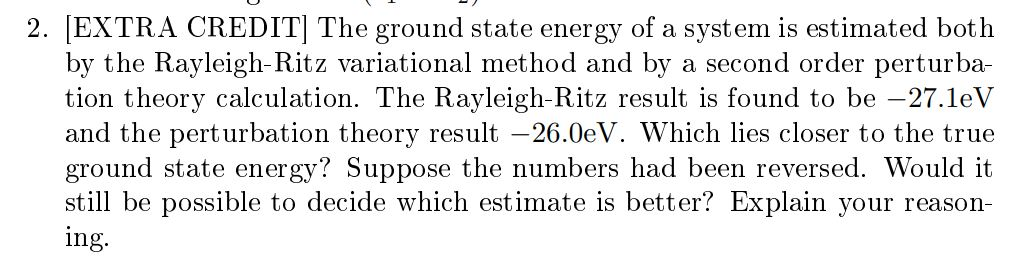

In [2]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
from matplotlib.animation import FuncAnimation
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd
from scipy.integrate import quad
from scipy.linalg import eigh
import ipywidgets as widgets
from ipywidgets import interact

style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

Eq(psi_s, sqrt(2)*(phi1(x1)*phi2(x2) + phi1(x2)*phi2(x1))/2)

Eq(psi_a, sqrt(2)*(phi1(x1)*phi2(x2) - phi1(x2)*phi2(x1))/2)

Eq(psi_a_same, 0)

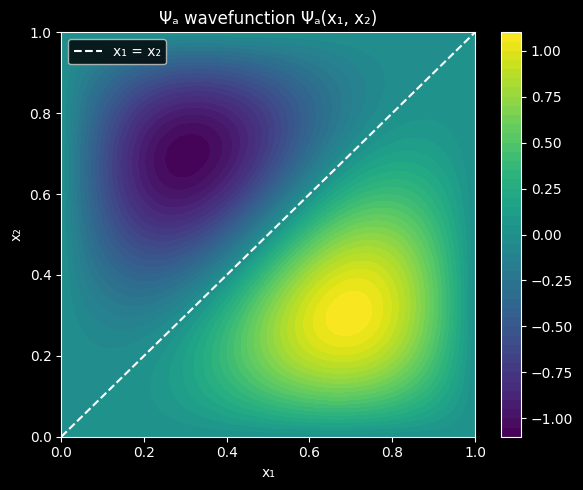

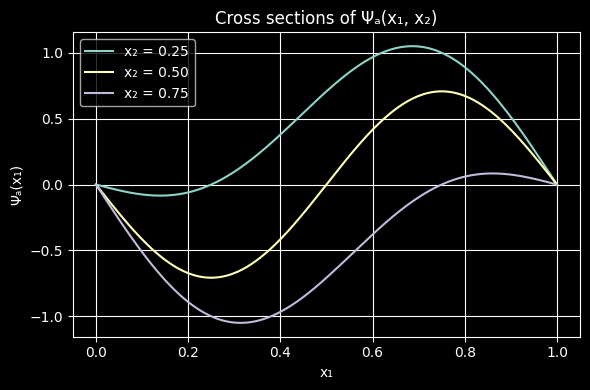

In [3]:
def problem_1():
    #when i use two particle wavefunc.
    x1, x2 = sp.symbols('x1 x2')
    phi1 = sp.Function('phi1')
    phi2 = sp.Function('phi2')

    #og product state (not symmetry)
    psi = phi1(x1)*phi2(x2)

    #symmetric combo
    psi_s = (phi1(x1)*phi2(x2) + phi1(x2)*phi2(x1))/sp.sqrt(2)

    #antisymmetric combo
    psi_a = (phi1(x1)*phi2(x2) - phi1(x2)*phi2(x1))/sp.sqrt(2)

    #display symbolic results
    display(sp.Eq(sp.Symbol('psi_s'), psi_s))
    display(sp.Eq(sp.Symbol('psi_a'), psi_a))

    #i can test antisymmetry when phi1 == phi2
    psi_a_same = psi_a.subs(phi2(x2), phi1(x2)).subs(phi2(x1), phi1(x1))

    #should simplify to zero
    display(sp.Eq(sp.Symbol('psi_a_same'), sp.simplify(psi_a_same)))

    #it does therefore psi_a vanishes if orbitals are same
    #just a quick visual when psi1 not equal to phi2
    def phi1_fn(x):
        return np.sin(np.pi * x)  #ex 1s

    def phi2_fn(x):
        return np.sin(2 * np.pi * x)  #ex 2s

    x = np.linspace(0, 1, 300)
    X1, X2 = np.meshgrid(x, x)
    psi_a_vals = (phi1_fn(X1) * phi2_fn(X2) - phi1_fn(X2) * phi2_fn(X1)) / np.sqrt(2)

    #plt
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    cs = ax.contourf(X1, X2, psi_a_vals, levels=50)
    fig.colorbar(cs, ax=ax)
    ax.set_title('Ψₐ wavefunction Ψₐ(x₁, x₂)')
    ax.set_xlabel('x₁')
    ax.plot(x, x, 'w--', label='x₁ = x₂')
    ax.legend()
    ax.set_ylabel('x₂')
    plt.tight_layout()
    plt.savefig('problem1_visual.png',dpi=600)
    plt.show()

    #cross sections of psi_a at fixed x₂
    #this shows us how if measure one particle the other behaves 
    #as clear nodal structure. this is antisymmetry across fixed x2 vals
    fig, ax = plt.subplots(figsize=(6, 4))
    for x2_fixed in [0.25, 0.5, 0.75]:
        psi_cross = (phi1_fn(x) * phi2_fn(x2_fixed) - phi1_fn(x2_fixed) * phi2_fn(x)) / np.sqrt(2)
        ax.plot(x, psi_cross, label=f'x₂ = {x2_fixed:.2f}')

    ax.set_title('Cross sections of Ψₐ(x₁, x₂)')
    ax.set_xlabel('x₁')
    ax.set_ylabel('Ψₐ(x₁)')
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.savefig('problem1_crosssections.png', dpi=600)
    plt.show()

problem_1()
#TODO: maybe put them as subplots l/r?